In [1]:
import pandas as pd

df = pd.read_csv("cnn_data_4_5_-1076392975.csv")

In [2]:
df.head()

,url,title,body,date
0,https://www.cnn.com/2020/03/23/media/japan-abe...,Japan asked the international media to change ...,"In the new system ""Canton becomes Guangzhou an...",3/24/2020
1,https://www.cnn.com/2020/03/16/perspectives/us...,The United States is still too reliant on oil,Saudi Arabia's decision to open its taps comes...,3/24/2020
2,https://www.cnn.com/2020/03/23/investing/globa...,Global stocks and US futures rise as policymak...,The promise of unlimited support for markets f...,3/24/2020
3,https://www.cnn.com/2020/03/24/economy/china-e...,China is trying to revive its economy without ...,The country where the pandemic began was almos...,3/24/2020
4,https://www.cnn.com/2020/03/24/business/bailou...,Companies that binged on buybacks now seek bai...,"Now, some of the same companies that binged on...",3/24/2020


In [4]:
import re
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)
word_dict = {}
for i in df["body"]:
    for j in i.split(" "):
        j = j.lower()
        j = re.sub('[^A-Za-z0-9]+', '', j)
        if j in word_dict.keys() and j not in stop_words and j != "" :
            word_dict[j] = word_dict[j]+1
        else:
            word_dict[j] = 1
        
#Convert dict into a dataframe
result_df = pd.DataFrame([word_dict])
result_df = result_df.T
result_df.reset_index(inplace = True)
result_df.columns = ["Word", "Count"]


#Sorting values by result of count
result_df.sort_values(by=['Count'], ascending=False, inplace = True)

#Getting top 500 words by count value
st_features = result_df.head(500)

st_features.to_csv("st_features.csv")

In [5]:
#Table of frequency for first fifty words
st_features.head(50)

,Word,Count
42,said,1921
255,will,1046
396,people,695
462,coronavirus,564
338,business,543
265,us,515
252,company,495
1103,workers,493
2,new,480
14,now,429


Text(0, 0.5, 'Frequency')

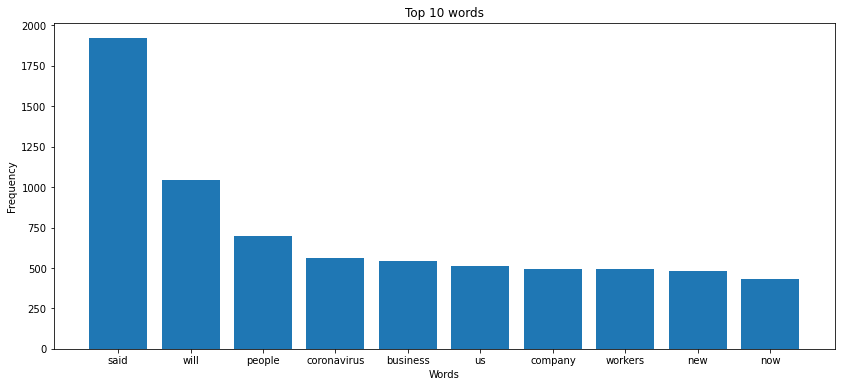

In [6]:
#Plotting bar chart of top ten words

import matplotlib.pyplot as plt
top_10 = st_features.head(10)


plt.figure(figsize = (14,6))

plt.bar(top_10["Word"], top_10["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [8]:
#Removing Outliers

features = st_features[st_features["Count"]<1000]

features.to_csv("Stoutliers.csv")

features

,Word,Count
396,people,695
462,coronavirus,564
338,business,543
265,us,515
252,company,495
...,...,...
1932,lines,48
2963,full,48
1672,15,48
1408,law,47


Text(0, 0.5, 'Frequency')

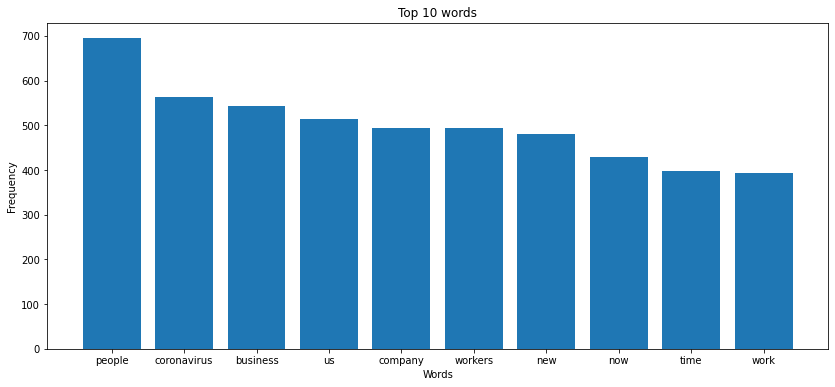

In [9]:
#Plotting bar chart of top ten words after outliers
top_10 = features.head(10)

plt.figure(figsize = (14,6))

plt.bar(top_10["Word"], top_10["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [10]:
#Obtaining frequency of tokens in Business Article and appearing in pandemic text
f = open("pandemic_092937.txt","r")
term = []
for x in f:
    for i in x.split():
        i = i.lower()
        i = re.sub('[^A-Za-z0-9]+', '', i)
        term.append(i)

In [11]:
test = features[features["Word"].isin(term) ]
test

,Word,Count
462,coronavirus,564
338,business,543
784,pandemic,289
1115,social,199
1029,covid19,113
1682,distancing,111
799,spread,92
744,emergency,92
1671,rate,91
672,national,83


Text(0, 0.5, 'Frequency')

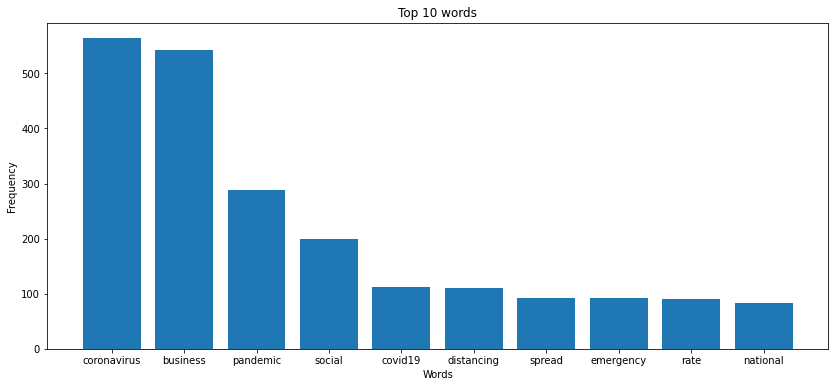

In [12]:
#plotting top ten result
top_ten = test.head(10)
import matplotlib.pyplot as plt
plt.figure(figsize = (14,6))

plt.bar(top_ten["Word"], top_ten["Count"])
plt.title("Top 10 words")
plt.xlabel("Words")
plt.ylabel("Frequency")